In [1]:
import pandas as pd

df = pd.read_csv('df.csv' , encoding='utf-8-sig')

In [ ]:
import pandas as pd
import numpy as np


obesity_path = 'data/2019_childhood_obesity_borough.csv'  
obesity_df = pd.read_csv(obesity_path, skiprows=3)

In [ ]:

print(obesity_df.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33'],
      dtype='object')


In [ ]:

obesity_selected = obesity_df.iloc[:, [1, 20, 23, 32, 33]].rename(
    columns={
        obesity_df.columns[1]: 'Borough',
        obesity_df.columns[20]: 'Reception_Prevalence',
        obesity_df.columns[23]: 'Year6_Prevalence',
        obesity_df.columns[32]: 'Reception_Children',
        obesity_df.columns[33]: 'Year6_Children'
    }
)

In [ ]:

print(obesity_selected.dtypes)


print(obesity_selected.head(10))

Borough                  object
Reception_Prevalence     object
Year6_Prevalence         object
Reception_Children       object
Year6_Children          float64
dtype: object
                Borough Reception_Prevalence Year6_Prevalence  \
0  Barking and Dagenham                 12.9             28.4   
1                Barnet                  7.6             20.4   
2                Bexley                  9.9             22.1   
3                 Brent                 11.3             25.1   
4               Bromley                  7.5               16   
5                Camden                  7.9             22.7   
6               Croydon                  9.6             24.2   
7                Ealing                  9.8             23.4   
8               Enfield                    u                u   
9             Greenwich                 13.9             28.2   

  Reception_Children  Year6_Children  
0               2130          3310.0  
1               3930          40

In [ ]:

obesity_selected.replace('u', 0, inplace=True)


obesity_selected['Reception_Prevalence'] = pd.to_numeric(obesity_selected['Reception_Prevalence'], errors='coerce')
obesity_selected['Year6_Prevalence'] = pd.to_numeric(obesity_selected['Year6_Prevalence'], errors='coerce')
obesity_selected['Reception_Children'] = pd.to_numeric(obesity_selected['Reception_Children'], errors='coerce')
obesity_selected['Year6_Children'] = pd.to_numeric(obesity_selected['Year6_Children'], errors='coerce')


print(obesity_selected.dtypes)


print(obesity_selected.head(10))

Borough                  object
Reception_Prevalence    float64
Year6_Prevalence        float64
Reception_Children      float64
Year6_Children          float64
dtype: object
                Borough  Reception_Prevalence  Year6_Prevalence  \
0  Barking and Dagenham                  12.9              28.4   
1                Barnet                   7.6              20.4   
2                Bexley                   9.9              22.1   
3                 Brent                  11.3              25.1   
4               Bromley                   7.5              16.0   
5                Camden                   7.9              22.7   
6               Croydon                   9.6              24.2   
7                Ealing                   9.8              23.4   
8               Enfield                   0.0               0.0   
9             Greenwich                  13.9              28.2   

   Reception_Children  Year6_Children  
0              2130.0          3310.0  
1       

In [ ]:

obesity_selected.replace('u', 0, inplace=True)


obesity_selected['Reception_Obese_Children'] = (obesity_selected['Reception_Prevalence'] / 100) * obesity_selected['Reception_Children']
obesity_selected['Year6_Obese_Children'] = (obesity_selected['Year6_Prevalence'] / 100) * obesity_selected['Year6_Children']


obesity_selected['Total_Obese_Children'] = obesity_selected['Reception_Obese_Children'] + obesity_selected['Year6_Obese_Children']
obesity_selected['Total_Children'] = obesity_selected['Reception_Children'] + obesity_selected['Year6_Children']
obesity_selected['Borough_Obesity_Rate'] = (obesity_selected['Total_Obese_Children'] / obesity_selected['Total_Children']) * 100


obesity_selected[['Borough', 'Reception_Prevalence','Year6_Prevalence','Reception_Children','Year6_Children','Borough_Obesity_Rate']]

Borough  Reception_Prevalence  Year6_Prevalence  \
0       Barking and Dagenham                  12.9              28.4   
1                     Barnet                   7.6              20.4   
2                     Bexley                   9.9              22.1   
3                      Brent                  11.3              25.1   
4                    Bromley                   7.5              16.0   
5                     Camden                   7.9              22.7   
6                    Croydon                   9.6              24.2   
7                     Ealing                   9.8              23.4   
8                    Enfield                   0.0               0.0   
9                  Greenwich                  13.9              28.2   
10                  Hackney1                  11.0              27.6   
11    Hammersmith and Fulham                   7.9              19.9   
12                  Haringey                   7.3              20.9   
13                    Harrow                   9.5              21.7   
14                  Havering                   9.9              23.8   
15                Hillingdon                  10.7              21.3   
16                  Hounslow                   9.7              24.1   
17                 Islington                   8.8              24.9   
18    Kensington and Chelsea                  10.2              22.1   
19      Kingston upon Thames                   7.7              18.6   
20                   Lambeth                  10.1              23.7   
21                  Lewisham                   9.9              23.8   
22                    Merton                   8.7              20.8   
23                    Newham                   0.0              28.1   
24                 Redbridge                  11.4              25.2   
25      Richmond upon Thames                   5.1              12.0   
26                 Southwark                  11.3              27.3   
27                    Sutton                   0.0              17.7   
28             Tower Hamlets                  12.0              25.7   
29            Waltham Forest                   9.8              24.0   
30                Wandsworth                   0.0               0.0   
31               Westminster                  10.0              25.0   
32                       NaN                   NaN               NaN   
33                North East                  11.0              23.2   
34                North West                  10.8              22.8   
35  Yorkshire and The Humber                  10.5              21.9   
36             East Midlands                   9.2              20.8   
37             West Midlands                  11.2              23.9   
38                      East                   9.0              19.0   
39                    London                  10.0              23.7   
40                South East                   8.9              17.8   
41                South West                   9.1              18.0   
42                       NaN                   NaN               NaN   
43                   England                   9.9              21.0   

    Reception_Children  Year6_Children  Borough_Obesity_Rate  
0               2130.0          3310.0             22.331066  
1               3930.0          4010.0             14.064484  
2               2180.0          2240.0             16.082805  
3               3420.0          3585.0             18.362527  
4               2145.0          2090.0             11.694805  
5                820.0           880.0             15.561176  
6               3810.0          4150.0             17.211809  
7               4040.0          4265.0             16.784226  
8                  NaN           935.0                   NaN  
9               3520.0          3230.0             20.742815  
10              1770.0          2370.0             20.502899  
11              1270.0  

In [ ]:
print('Borough' in df.columns)  
print('Borough' in obesity_selected.columns)  

True
True


In [ ]:

df = df.merge(
    obesity_selected[['Borough','Borough_Obesity_Rate']],
    left_on='Borough',
    right_on='Borough',
    how='left'
)

In [ ]:
df = df.dropna(subset=['Reception_obese_prevalence', 'Year6_obese_prevalence'])

df_borough = df
df = df.drop(columns = ['Borough','Reception_obese_prevalence','Year6_obese_prevalence'])
df_borough.columns = df_borough.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')
print(df.columns)


print(df.head())

Index(['greenspace_coverage', 'per_capita_greenspace', 'bowling_green',
       'other_sports_facility', 'play_space', 'playing_field',
       'public_park_or_garden', 'tennis_court', 'imd_average_score',
       'accessible_greenspace_area', 'borough_obesity_rate'],
      dtype='object')
   greenspace_coverage  per_capita_greenspace  bowling_green  \
0             0.075220              34.715947       0.006783   
1             0.130537              29.707056       0.006306   
3             0.419378              91.058783       0.002214   
4             0.305096              55.733415       0.002461   
5             0.418702             126.740482       0.001439   

   other_sports_facility  play_space  playing_field  public_park_or_garden  \
0               0.167762    0.011658       0.232064               0.567580   
1               0.060844    0.009935       0.227366               0.690160   
3               0.061973    0.003326       0.071059               0.857883   
4              

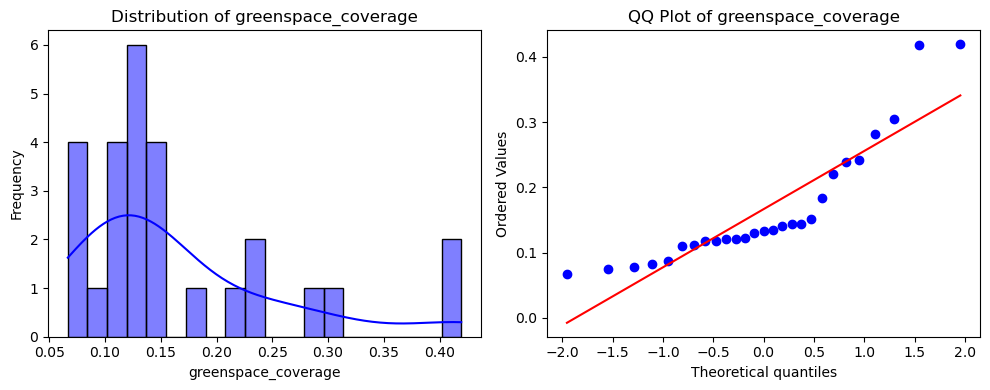

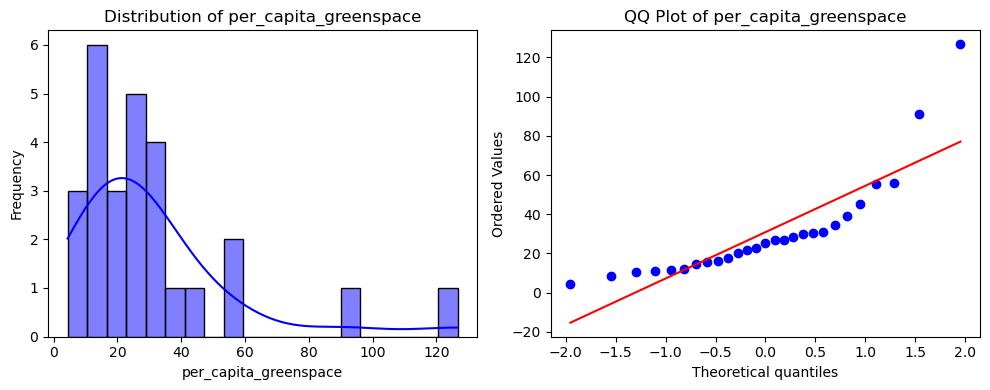

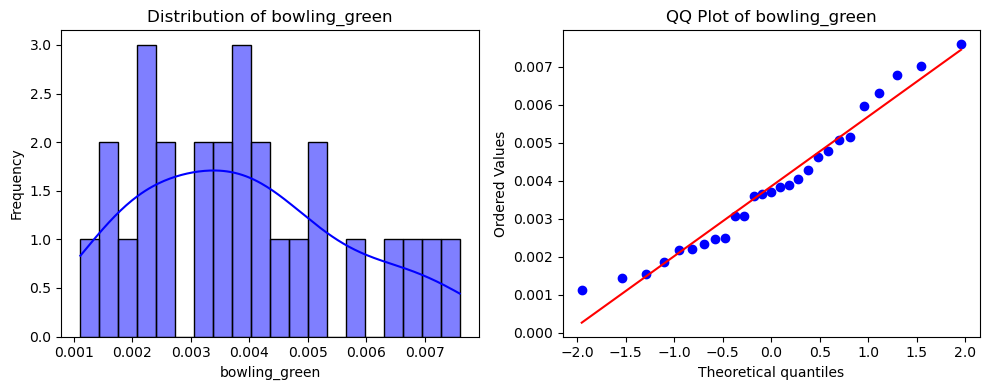

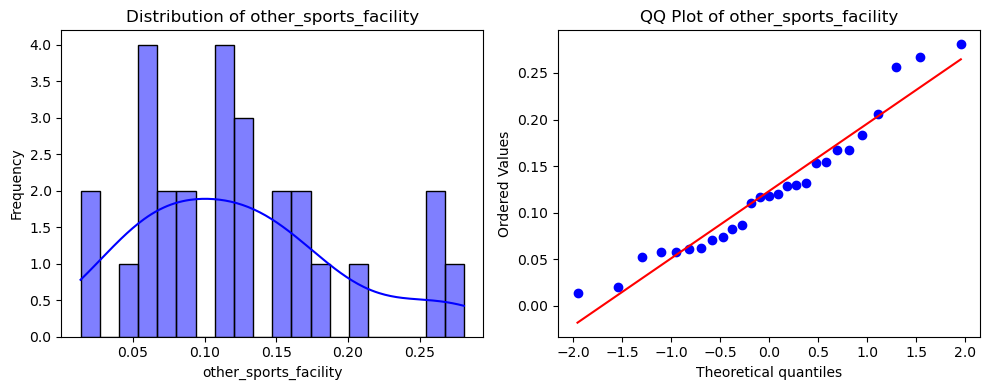

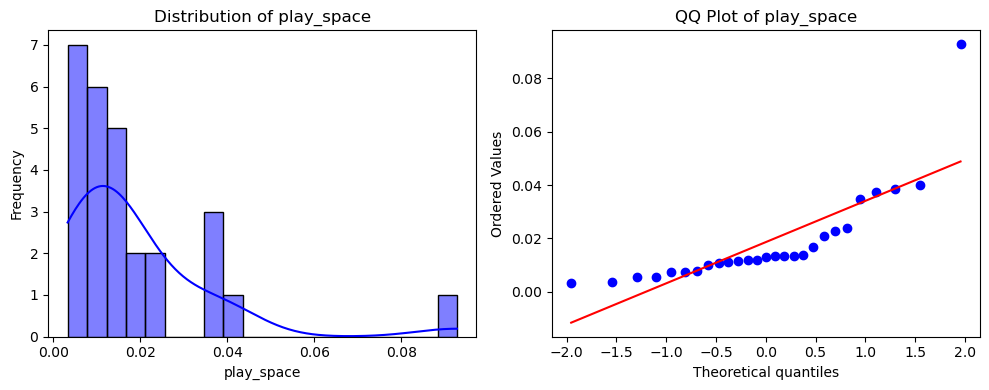

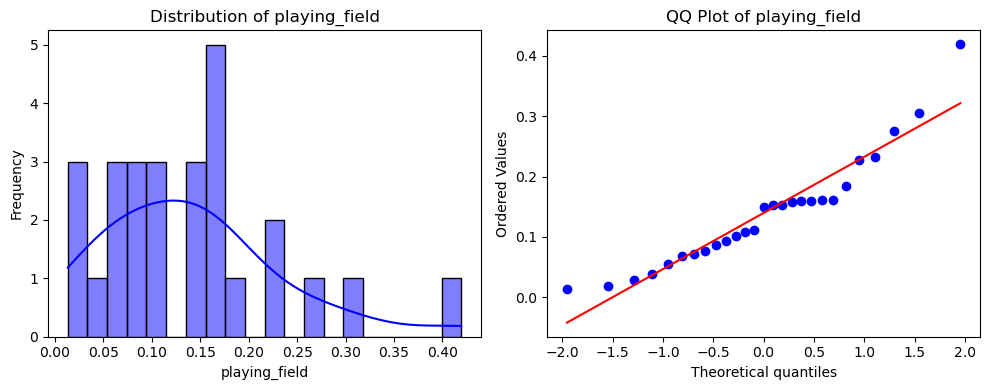

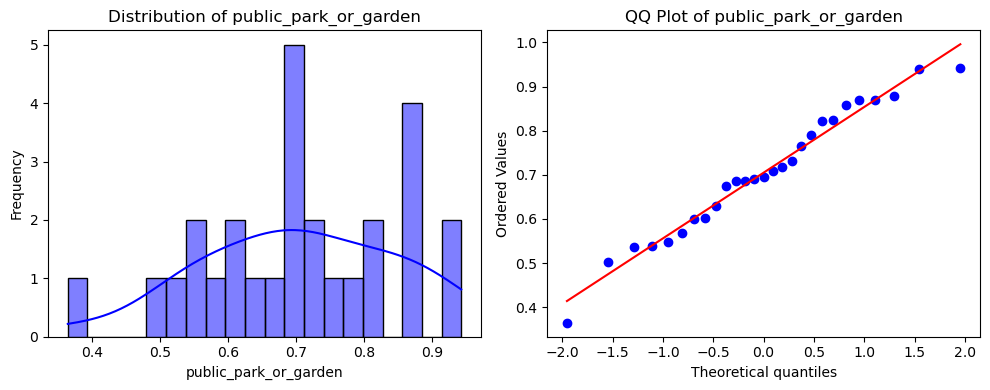

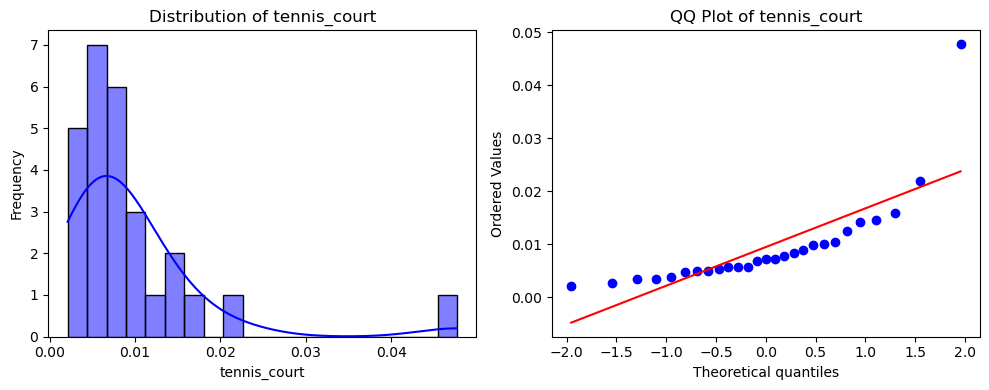

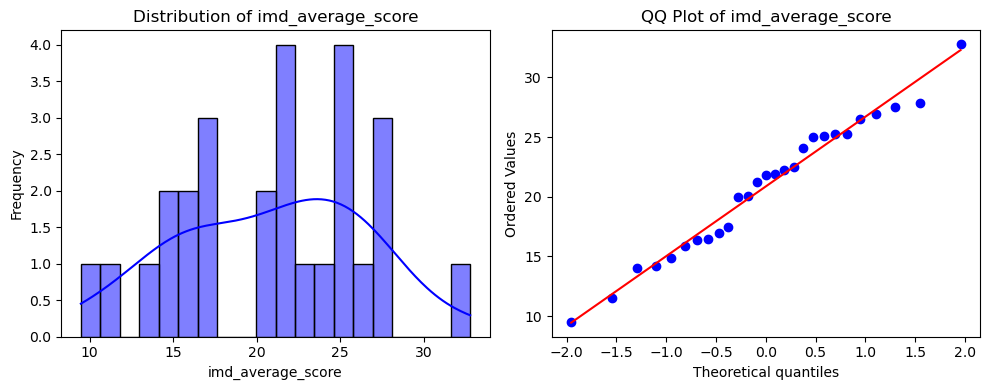

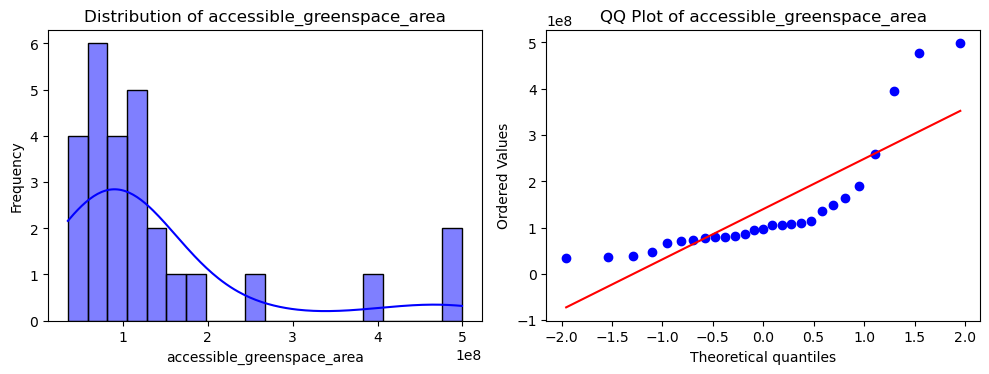

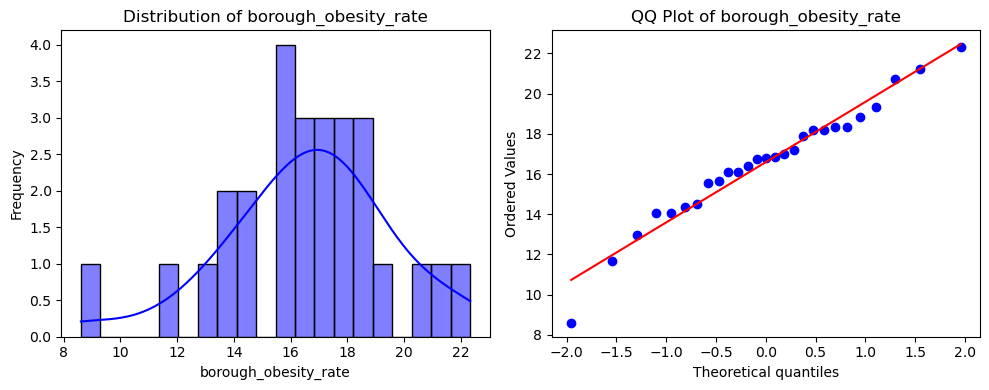

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


for col in df:
    plt.figure(figsize=(10, 4))
    

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    

    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {col}')
    
    plt.tight_layout()
    plt.show()

In [ ]:

variables = df.columns


for var in variables:

    stat, p_value = stats.shapiro(df[var].dropna())

    print(f"{var} - Shapiro-Wilk检验统计量: {stat:.4f}, p值: {p_value:.4f}")
    

    if p_value > 0.05:
        print(f"{var} 数据符合正态分布 (不能拒绝原假设)\n")
    else:
        print(f"{var} 数据不符合正态分布 (拒绝原假设)\n")

greenspace_coverage - Shapiro-Wilk检验统计量: 0.8058, p值: 0.0002
greenspace_coverage 数据不符合正态分布 (拒绝原假设)

per_capita_greenspace - Shapiro-Wilk检验统计量: 0.7483, p值: 0.0000
per_capita_greenspace 数据不符合正态分布 (拒绝原假设)

bowling_green - Shapiro-Wilk检验统计量: 0.9590, p值: 0.3512
bowling_green 数据符合正态分布 (不能拒绝原假设)

other_sports_facility - Shapiro-Wilk检验统计量: 0.9419, p值: 0.1360
other_sports_facility 数据符合正态分布 (不能拒绝原假设)

play_space - Shapiro-Wilk检验统计量: 0.6820, p值: 0.0000
play_space 数据不符合正态分布 (拒绝原假设)

playing_field - Shapiro-Wilk检验统计量: 0.9175, p值: 0.0344
playing_field 数据不符合正态分布 (拒绝原假设)

public_park_or_garden - Shapiro-Wilk检验统计量: 0.9730, p值: 0.6815
public_park_or_garden 数据符合正态分布 (不能拒绝原假设)

tennis_court - Shapiro-Wilk检验统计量: 0.6435, p值: 0.0000
tennis_court 数据不符合正态分布 (拒绝原假设)

imd_average_score - Shapiro-Wilk检验统计量: 0.9776, p值: 0.8051
imd_average_score 数据符合正态分布 (不能拒绝原假设)

accessible_greenspace_area - Shapiro-Wilk检验统计量: 0.6988, p值: 0.0000
accessible_greenspace_area 数据不符合正态分布 (拒绝原假设)

borough_obesity_rate - Shapiro-Wilk检验统计量

In [ ]:
from scipy import stats


variables_to_transform = ['greenspace_coverage','per_capita_greenspace',
                          'play_space', 'playing_field','tennis_court','accessible_greenspace_area']


for var in variables_to_transform:

    data_cleaned = df[var].dropna()
    
    if (data_cleaned <= 0).any():

        print(f"Warning: {var} contains non-positive values, skipping Box-Cox transformation.")
    else:

        transformed_data, lambda_value = stats.boxcox(data_cleaned)
        

        df.loc[data_cleaned.index, f'{var}_boxcox'] = transformed_data

        print(f"The optimal Box-Cox λ value for {var}: {lambda_value}")

The optimal Box-Cox λ value for greenspace_coverage: -0.5489751248955999
The optimal Box-Cox λ value for per_capita_greenspace: -0.05131426945106778
The optimal Box-Cox λ value for play_space: -0.175234755830317
The optimal Box-Cox λ value for playing_field: 0.41434653338874844
The optimal Box-Cox λ value for tennis_court: -0.2725223894375439
The optimal Box-Cox λ value for accessible_greenspace_area: -0.3569779712929931


In [ ]:

variables = ['greenspace_coverage_boxcox', 'per_capita_greenspace_boxcox',
            'play_space_boxcox', 'playing_field_boxcox','tennis_court_boxcox','accessible_greenspace_area_boxcox']


for var in variables:

    stat, p_value = stats.shapiro(df[var].dropna())
    

    print(f"{var} - Shapiro-Wilk检验统计量: {stat:.4f}, p值: {p_value:.4f}")
    

    if p_value > 0.05:
        print(f"{var} 数据符合正态分布 (不能拒绝原假设)\n")
    else:
        print(f"{var} 数据不符合正态分布 (拒绝原假设)\n")

greenspace_coverage_boxcox - Shapiro-Wilk检验统计量: 0.9633, p值: 0.4382
greenspace_coverage_boxcox 数据符合正态分布 (不能拒绝原假设)

per_capita_greenspace_boxcox - Shapiro-Wilk检验统计量: 0.9872, p值: 0.9775
per_capita_greenspace_boxcox 数据符合正态分布 (不能拒绝原假设)

play_space_boxcox - Shapiro-Wilk检验统计量: 0.9765, p值: 0.7773
play_space_boxcox 数据符合正态分布 (不能拒绝原假设)

playing_field_boxcox - Shapiro-Wilk检验统计量: 0.9802, p值: 0.8677
playing_field_boxcox 数据符合正态分布 (不能拒绝原假设)

tennis_court_boxcox - Shapiro-Wilk检验统计量: 0.9936, p值: 0.9997
tennis_court_boxcox 数据符合正态分布 (不能拒绝原假设)

accessible_greenspace_area_boxcox - Shapiro-Wilk检验统计量: 0.9573, p值: 0.3210
accessible_greenspace_area_boxcox 数据符合正态分布 (不能拒绝原假设)



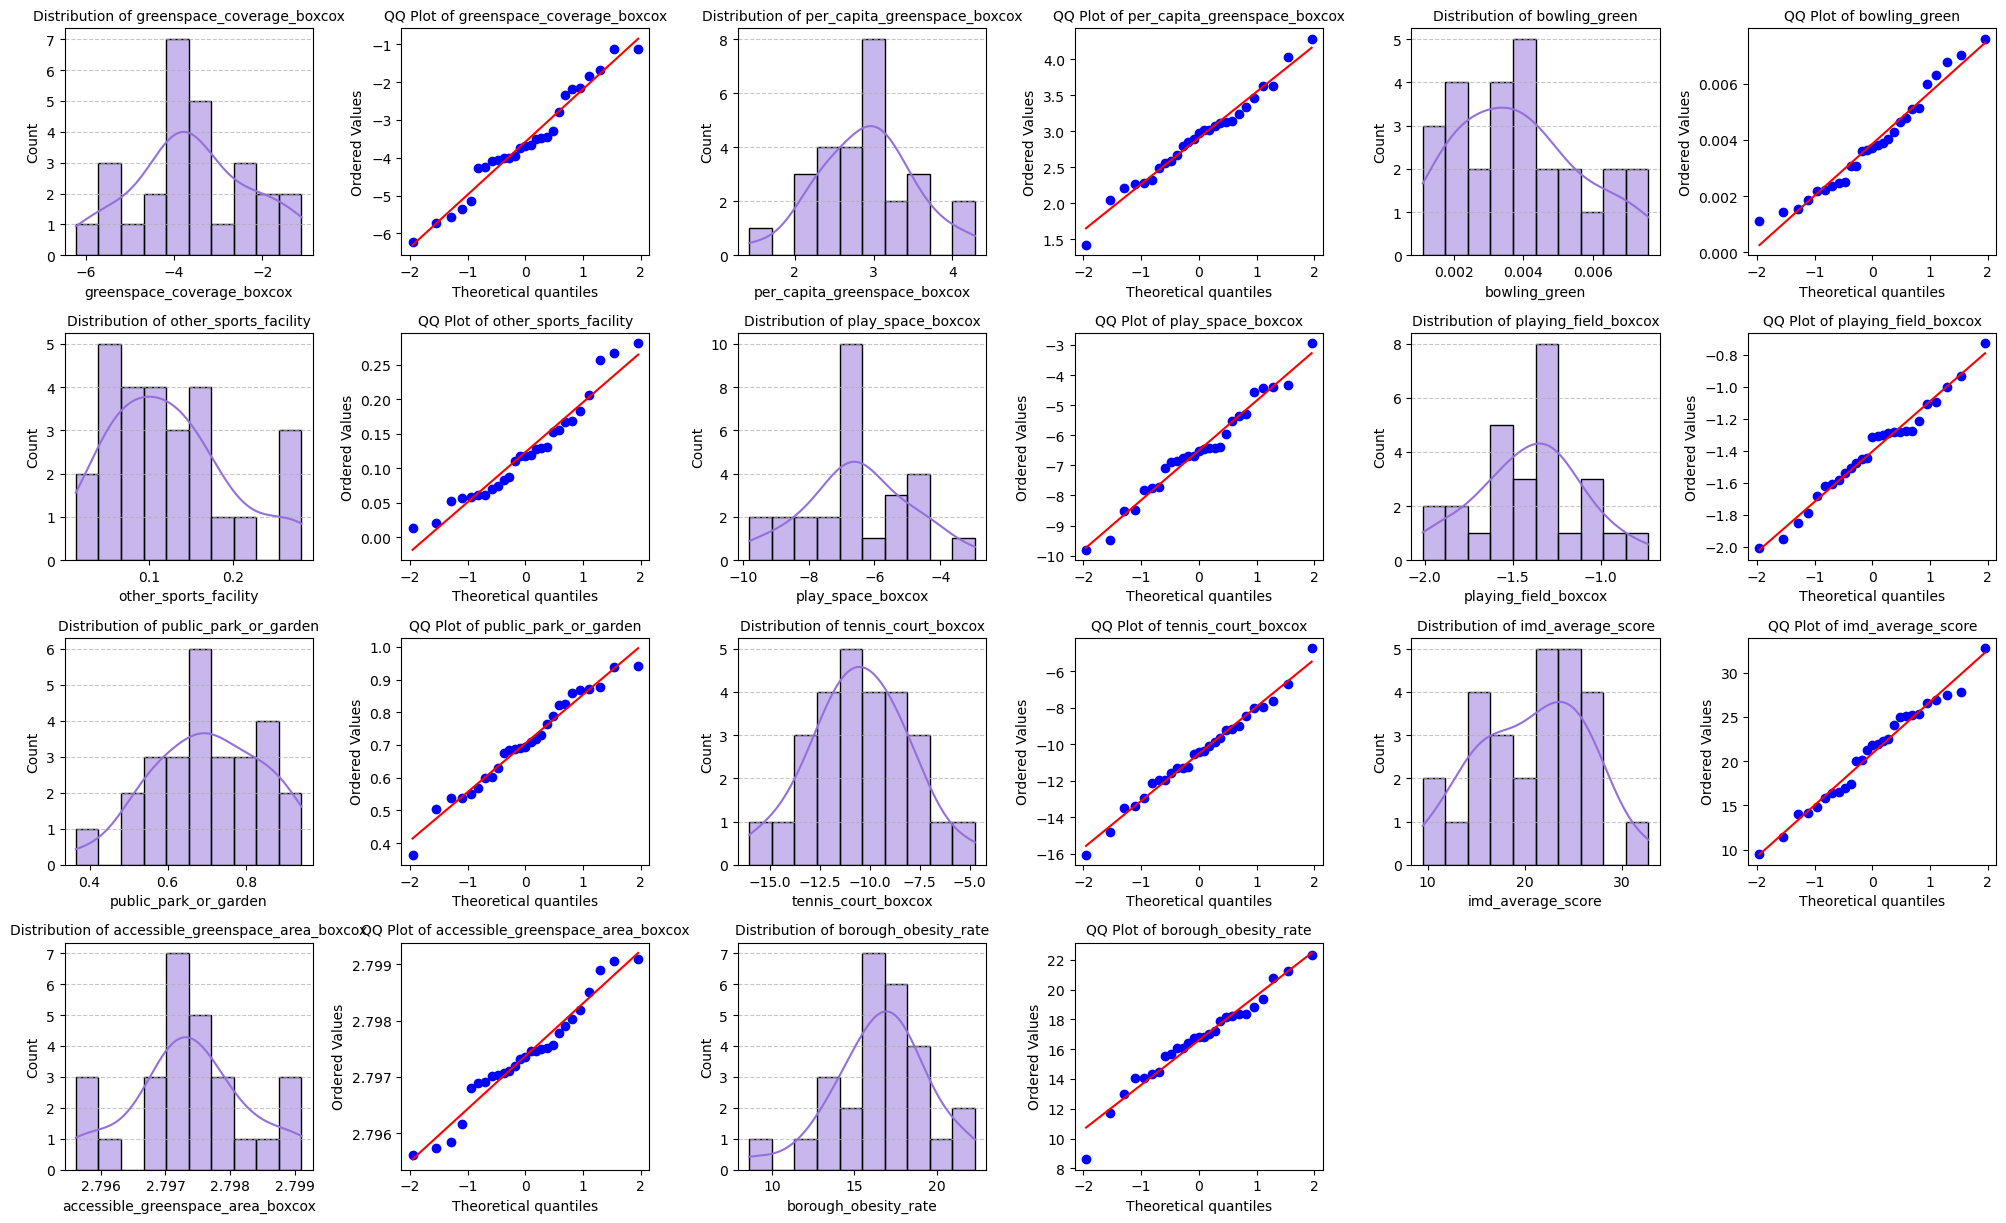

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


plt.figure(figsize=(20, 18))  


variables = ['greenspace_coverage_boxcox', 'per_capita_greenspace_boxcox', 'bowling_green',
             'other_sports_facility', 'play_space_boxcox', 'playing_field_boxcox',
             'public_park_or_garden', 'tennis_court_boxcox', 'imd_average_score',
             'accessible_greenspace_area_boxcox', 'borough_obesity_rate']


cols = 6  
rows = -(-len(variables) // 2)  


for i, var in enumerate(variables, 1):
    plt.subplot(rows, cols, 2*i - 1)  
    sns.histplot(df[var].dropna(), kde=True, bins=10, color="mediumpurple")
    plt.title(f'Distribution of {var}', fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.subplot(rows, cols, 2*i)  
    stats.probplot(df[var].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ Plot of {var}', fontsize=10)


plt.tight_layout()
plt.show()

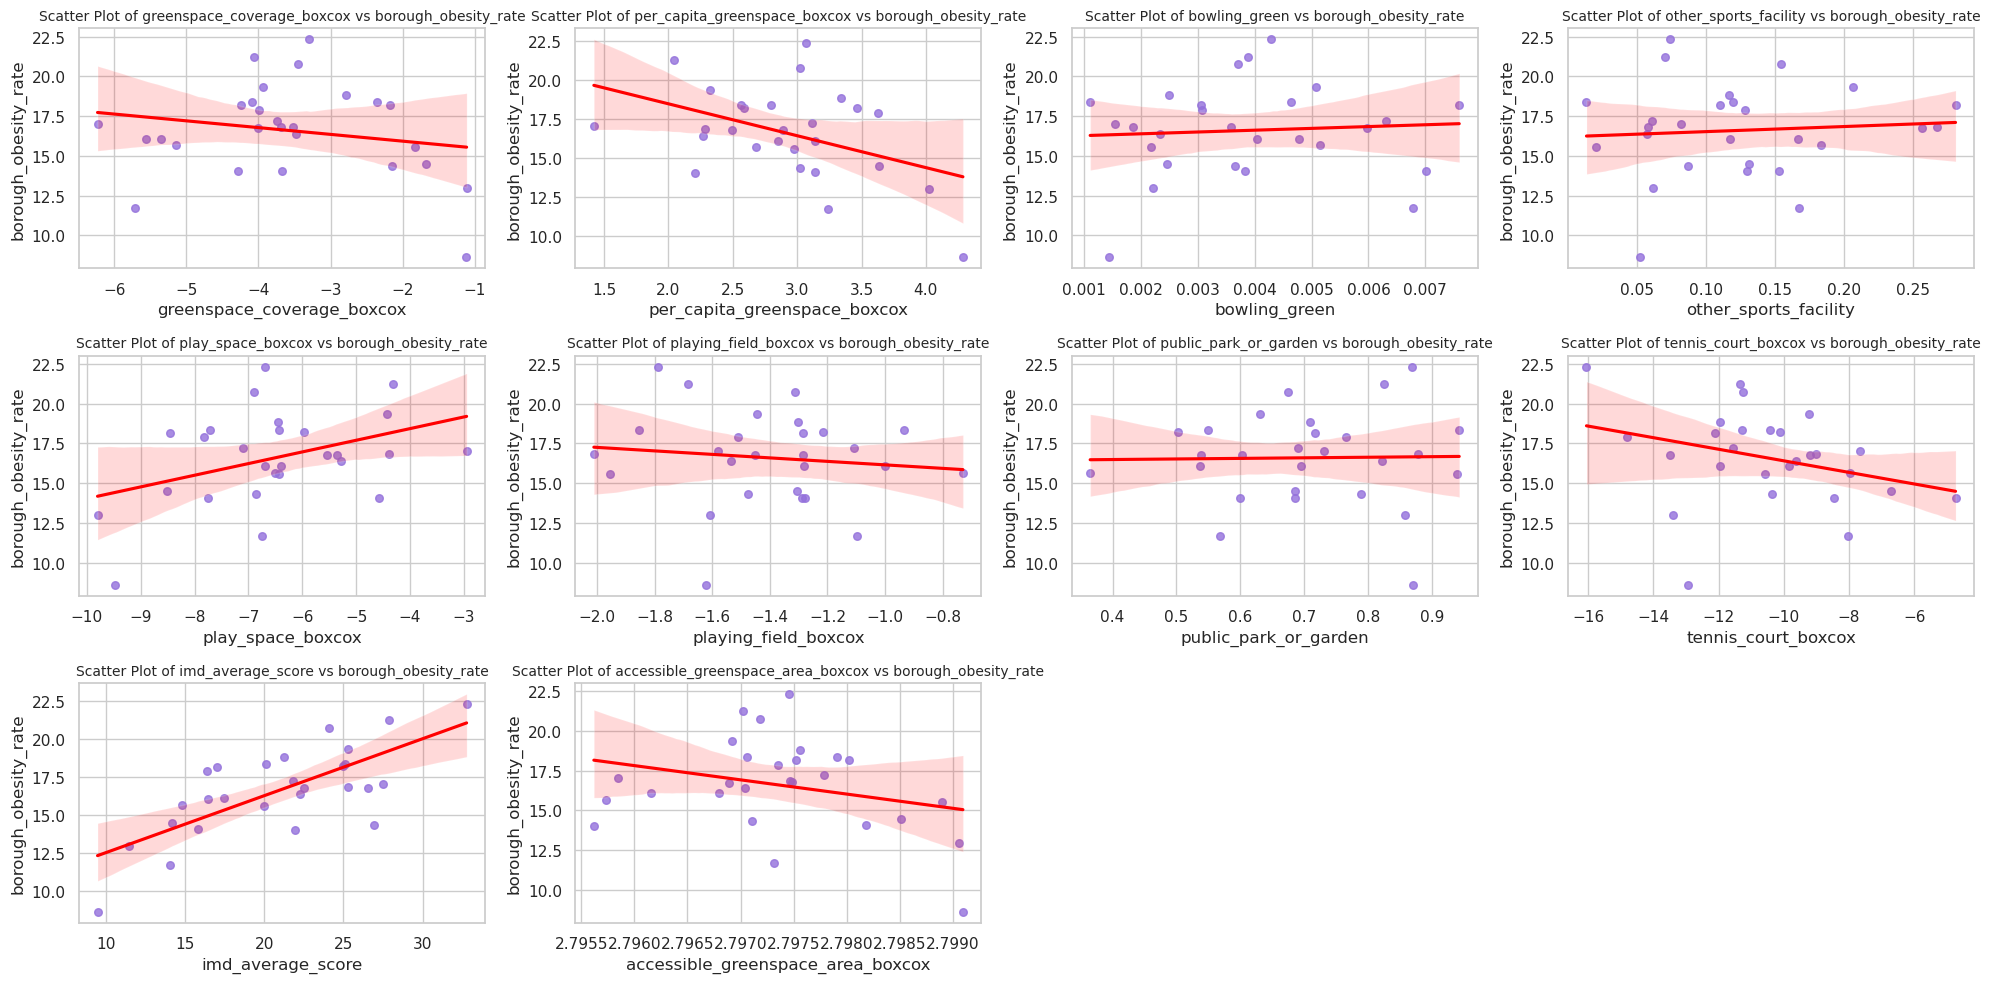

In [ ]:

sns.set(style="whitegrid")


plt.figure(figsize=(20, 10))  


variables = ['greenspace_coverage_boxcox', 'per_capita_greenspace_boxcox', 'bowling_green',
             'other_sports_facility', 'play_space_boxcox', 'playing_field_boxcox',
             'public_park_or_garden', 'tennis_court_boxcox', 'imd_average_score',
             'accessible_greenspace_area_boxcox']


cols = 4 
rows = -(-len(variables) // cols)  


for i, var in enumerate(variables, 1):
    plt.subplot(rows, cols, i)  
    sns.regplot(x=var, y='borough_obesity_rate', data=df, 
                scatter_kws={'s': 30, 'color': 'mediumpurple'}, 
                line_kws={"color": "red"})
    plt.title(f'Scatter Plot of {var} vs borough_obesity_rate', fontsize=10)


plt.tight_layout()
plt.show()

In [17]:
df = df[['greenspace_coverage_boxcox', 'per_capita_greenspace_boxcox', 'bowling_green',
       'other_sports_facility', 'play_space_boxcox', 'playing_field_boxcox',
       'public_park_or_garden', 'tennis_court_boxcox', 'imd_average_score',
       'accessible_greenspace_area_boxcox', 'borough_obesity_rate']]

In [ ]:

stats = df.describe().T  
stats['Median'] = df.median()  


summary_table = stats[['mean', 'Median', 'min', 'max', 'std']]
summary_table.columns = ['Mean', 'Median', 'Min', 'Max', 'Std']


print(summary_table)

                                        Mean     Median        Min        Max  \
greenspace_coverage_boxcox         -3.580109  -3.689873  -6.231942  -1.113555   
per_capita_greenspace_boxcox        2.907820   2.973341   1.420388   4.287452   
bowling_green                       0.003855   0.003704   0.001109   0.007595   
other_sports_facility               0.123287   0.117551   0.013596   0.280821   
play_space_boxcox                  -6.503590  -6.515561  -9.803801  -2.949426   
playing_field_boxcox               -1.405221  -1.312763  -2.011294  -0.729671   
public_park_or_garden               0.704971   0.694246   0.364914   0.942524   
tennis_court_boxcox               -10.524318 -10.424233 -16.047223  -4.738947   
imd_average_score                  20.863583  21.789286   9.483333  32.770588   
accessible_greenspace_area_boxcox   2.797371   2.797348   2.795619   2.799094   
borough_obesity_rate               16.594794  16.784226   8.606389  22.331066   

                           

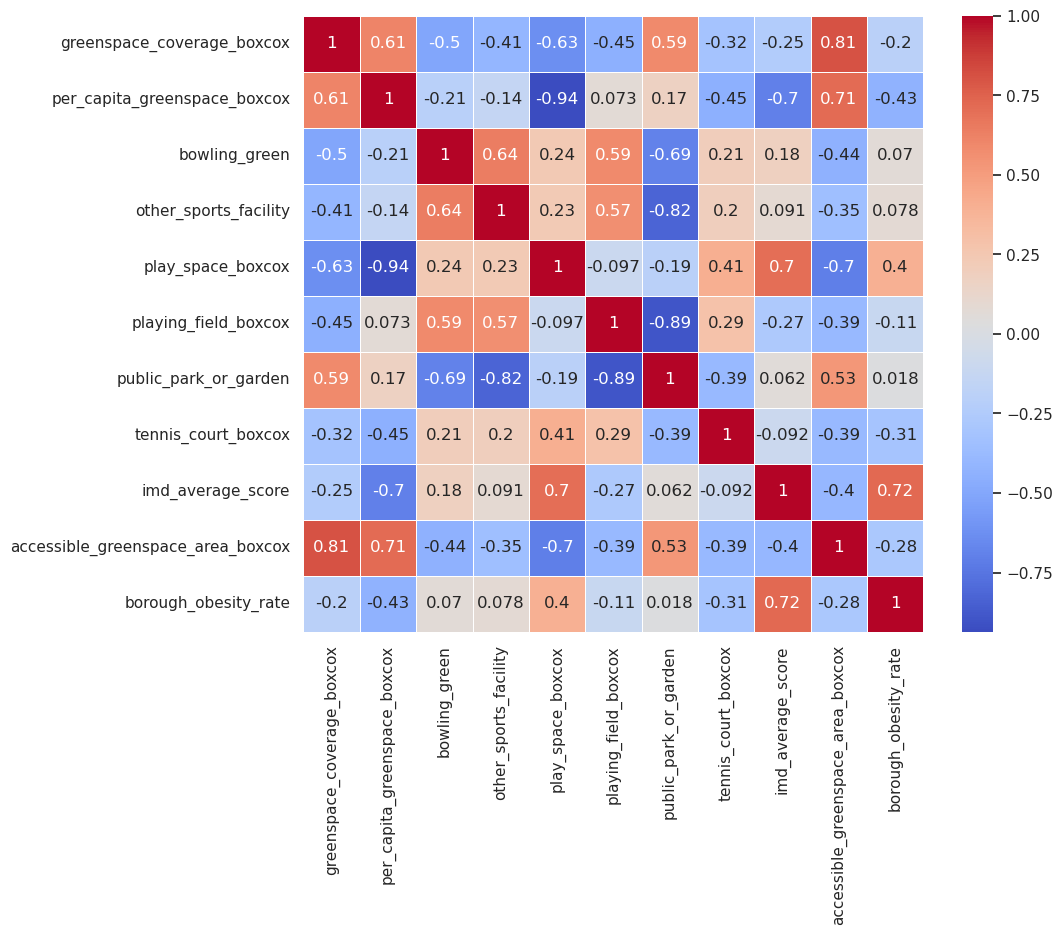

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


fig = plt.gcf()  
fig.patch.set_alpha(0)  
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

def calculate_vif_with_constant(df):
    """
    自动计算 VIF，显式添加常数列，并逐步移除高 VIF 的变量。
    """

    df_with_const = add_constant(df)


    vif_data = pd.DataFrame()
    vif_data["Variable"] = df_with_const.columns
    vif_data["VIF"] = [
        variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])
    ]
    return vif_data


target_column = 'borough_obesity_rate'  
X = df.drop(columns=[target_column]) 


vif_results = calculate_vif_with_constant(X)
print("初始 VIF:")
print(vif_results)


threshold = 10
while vif_results['VIF'][1:].max() > threshold:  
    drop_col = vif_results.loc[vif_results['VIF'][1:].idxmax(), 'Variable']  
    print(f"移除高 VIF 变量: {drop_col}")
    X = X.drop(columns=[drop_col])  
    vif_results = calculate_vif_with_constant(X)


print("最终 VIF:")
print(vif_results)

初始 VIF:
                             Variable           VIF
0                               const  4.277960e+07
1          greenspace_coverage_boxcox  5.158961e+00
2        per_capita_greenspace_boxcox  1.221307e+01
3                       bowling_green  2.409911e+00
4               other_sports_facility  1.069537e+01
5                   play_space_boxcox  1.347807e+01
6                playing_field_boxcox  2.184474e+01
7               public_park_or_garden  4.596383e+01
8                 tennis_court_boxcox  3.060469e+00
9                   imd_average_score  5.305786e+00
10  accessible_greenspace_area_boxcox  4.430623e+00
移除高 VIF 变量: public_park_or_garden
移除高 VIF 变量: play_space_boxcox
最终 VIF:
                            Variable           VIF
0                              const  4.206831e+07
1         greenspace_coverage_boxcox  4.302320e+00
2       per_capita_greenspace_boxcox  8.818809e+00
3                      bowling_green  2.375012e+00
4              other_sports_facility  1.9

In [21]:
df = df.drop(columns=['public_park_or_garden','play_space_boxcox' ])

In [ ]:
import statsmodels.api as sm

X = df[['greenspace_coverage_boxcox', 'per_capita_greenspace_boxcox', 'bowling_green',
       'other_sports_facility',  'playing_field_boxcox', 'tennis_court_boxcox', 'imd_average_score',
       'accessible_greenspace_area_boxcox']]

y = df['borough_obesity_rate']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     borough_obesity_rate   R-squared:                       0.642
Model:                              OLS   Adj. R-squared:                  0.482
Method:                   Least Squares   F-statistic:                     4.029
Date:                  Mon, 13 Jan 2025   Prob (F-statistic):            0.00671
Time:                          16:05:11   Log-Likelihood:                -53.000
No. Observations:                    27   AIC:                             124.0
Df Residuals:                        18   BIC:                             135.7
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

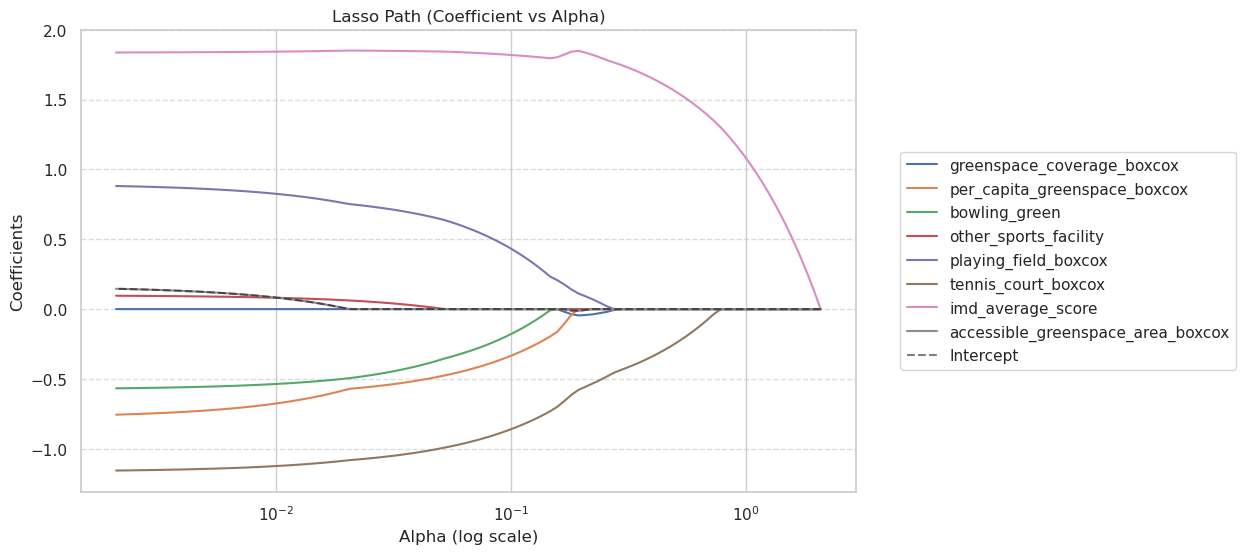

最佳alpha: 0.25690980242133316
系数: [-0.01920273 -0.         -0.          0.          0.01941036 -0.48175691
  1.78304979 -0.        ]


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=['borough_obesity_rate'])
y = df['borough_obesity_rate']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


lasso = LassoCV(cv=5, max_iter=10000)
lasso.fit(X_scaled, y)


alphas_lasso, coefs_lasso, _ = lasso.path(X_scaled, y)


plt.figure(figsize=(10, 6))
ax = plt.gca()

for i in range(X.shape[1]):
    ax.plot(alphas_lasso, coefs_lasso[i, :], label=X.columns[i])

ax.plot(alphas_lasso, coefs_lasso[-1, :], label="Intercept", linestyle="--", color="black", alpha = 0.5)


ax.set_xscale('log') 
ax.set_xlabel("Alpha (log scale)")
ax.set_ylabel("Coefficients")
ax.set_title("Lasso Path (Coefficient vs Alpha)")


ax = plt.gca()
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_facecolor("none")  


fig = plt.gcf()  
fig.patch.set_alpha(0)  


plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.axis('tight')
plt.show()



print(f"最佳alpha: {lasso.alpha_}")
print(f"系数: {lasso.coef_}")

In [ ]:
from sklearn.linear_model import Lasso


X = df.drop(columns=['borough_obesity_rate'])


y = df['borough_obesity_rate']


lasso = Lasso(alpha=0.01)  
lasso.fit(X, y)


coef = lasso.coef_


coef_df = pd.DataFrame({
    'Variable': X.columns, 
    'Coefficient': coef
})


print("Lasso 模型的系数：")
print(coef_df)


zero_coef_vars = coef_df[coef_df['Coefficient'] == 0]['Variable'].tolist()
print("系数为零的变量:", zero_coef_vars)


non_zero_coef_vars = coef_df[coef_df['Coefficient'] != 0]['Variable'].tolist()
print("非零变量:", non_zero_coef_vars)

Lasso 模型的系数：
                            Variable  Coefficient
0         greenspace_coverage_boxcox     0.102271
1       per_capita_greenspace_boxcox    -1.220701
2                      bowling_green    -0.000000
3              other_sports_facility    -0.000000
4               playing_field_boxcox     1.759999
5                tennis_court_boxcox    -0.481129
6                  imd_average_score     0.293319
7  accessible_greenspace_area_boxcox     0.000000
系数为零的变量: ['bowling_green', 'other_sports_facility', 'accessible_greenspace_area_boxcox']
非零变量: ['greenspace_coverage_boxcox', 'per_capita_greenspace_boxcox', 'playing_field_boxcox', 'tennis_court_boxcox', 'imd_average_score']


In [ ]:

X = df[['greenspace_coverage_boxcox', 'per_capita_greenspace_boxcox',  'playing_field_boxcox', 'tennis_court_boxcox', 'imd_average_score']]

y = df['borough_obesity_rate']


X = sm.add_constant(X)


model = sm.OLS(y, X).fit()


print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     borough_obesity_rate   R-squared:                       0.624
Model:                              OLS   Adj. R-squared:                  0.535
Method:                   Least Squares   F-statistic:                     6.972
Date:                  Mon, 13 Jan 2025   Prob (F-statistic):           0.000558
Time:                          16:05:12   Log-Likelihood:                -53.648
No. Observations:                    27   AIC:                             119.3
Df Residuals:                        21   BIC:                             127.1
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

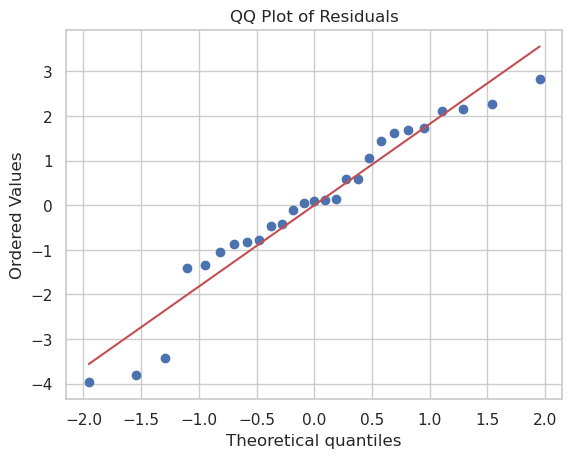

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt


residuals = model.resid


stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()

In [ ]:
import geopandas as gpd


shapefile_path = "data/london_boundary/London_Borough_Excluding_MHW.shp"  # 替换为你的文件路径
geo_data = gpd.read_file(shapefile_path)


print(geo_data.head())
print(geo_data.crs) 

                   NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  
1     None  POLYGON ((535009.2 159504.7, 535005.5 159502, ...  
2     None  POLYGON ((540373.6 157530.4, 540361.2 157551.9...  
3     None  POLYGON ((521975.8 178100, 521967.7 178096.8, ...  
4     None  POLYGON ((510253.5 182881.6, 510249.9 182886, ...  
PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,

In [28]:
df_gwp = df_borough[['borough','borough_obesity_rate','imd_average_score']]
df_gwp = df_gwp.merge(
    df[['greenspace_coverage_boxcox', 'per_capita_greenspace_boxcox', 'playing_field_boxcox',
       'tennis_court_boxcox', 'imd_average_score']],
    left_on='imd_average_score',
    right_on='imd_average_score',
    how='left'
)

df_gwp = df_gwp.merge(
    geo_data[['NAME','geometry']],
    left_on='borough',
    right_on='NAME',
    how='left'
)

In [ ]:
from esda.moran import Moran
from libpysal.weights import KNN
import geopandas as gpd


df_gwp = gpd.GeoDataFrame(df_gwp, geometry='geometry')


w = KNN.from_dataframe(df_gwp, k=2)  
w.transform = 'r'  


residuals = model.resid


moran = Moran(residuals, w)
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

Moran's I: -0.08699898177999045, p-value: 0.371


In [30]:
print(df_gwp.head())

                borough  borough_obesity_rate  imd_average_score  \
0               Bromley             11.694805          14.040909   
1               Croydon             17.211809          21.789286   
2  Kingston upon Thames             12.976984          11.475000   
3                Merton             14.488187          14.155000   
4  Richmond upon Thames              8.606389           9.483333   

   greenspace_coverage_boxcox  per_capita_greenspace_boxcox  \
0                   -5.717380                      3.243093   
1                   -3.748836                      3.112688   
2                   -1.113555                      4.027358   
3                   -1.673679                      3.632941   
4                   -1.116157                      4.287452   

   playing_field_boxcox  tennis_court_boxcox                  NAME  \
0             -1.095856            -8.039876               Bromley   
1             -1.106975           -11.563762               Croydon   
2 

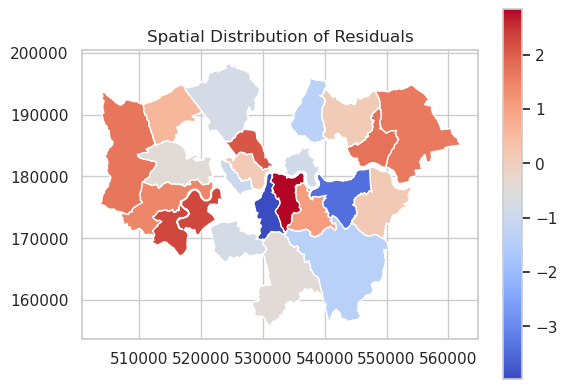

In [31]:
df_gwp['residuals'] = residuals
df_gwp.plot(column='residuals', cmap='coolwarm', legend=True)
plt.title("Spatial Distribution of Residuals")
plt.show()

In [32]:
geo_data = geo_data.merge(
    df_borough[['borough','borough_obesity_rate','imd_average_score']],
    left_on='NAME',
    right_on='borough',
    how='left'
)

In [ ]:

geo_data['obesity_norm'] = (geo_data['borough_obesity_rate'] - geo_data['borough_obesity_rate'].mean()) / geo_data['borough_obesity_rate'].std()
geo_data['imd_norm'] = (geo_data['imd_average_score'] - geo_data['imd_average_score'].mean()) / geo_data['imd_average_score'].std()


geo_data['combined_score'] = geo_data['obesity_norm'] + geo_data['imd_norm']

In [ ]:

sorted_geo_data = geo_data[['NAME', 'combined_score']].sort_values(by='combined_score', ascending=False)


print(sorted_geo_data)

                      NAME  combined_score
31    Barking and Dagenham        4.059005
26           Tower Hamlets        2.815415
13               Greenwich        1.984858
11               Southwark        1.719663
8                    Brent        1.349341
27               Islington        1.316141
16          Waltham Forest        1.275478
12                Lewisham        1.056962
10                 Lambeth        0.861679
3                 Hounslow        0.827347
24             Westminster        0.463269
1                  Croydon        0.373882
4                   Ealing        0.356722
29                Haringey        0.306721
23  Kensington and Chelsea        0.179775
17               Redbridge       -0.140648
5                 Havering       -0.351972
25                  Camden       -0.504943
22  Hammersmith and Fulham       -0.684044
6               Hillingdon       -0.774626
14                  Bexley       -0.949518
7                   Harrow       -1.383743
9          

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


greenspace_path = 'data/OS Open Greenspace (ESRI Shape File) GB/data/GB_GreenspaceSite.shp'  # 替换为绿地文件路径
greenspace_gdf = gpd.read_file(greenspace_path)

In [ ]:

excluded_types = [
    'Allotments Or Community Growing Spaces', 
    'Cemetery', 
    'Religious Grounds', 
    'Golf Course'
]
greenspace_gdf = greenspace_gdf[~greenspace_gdf['function'].isin(excluded_types)]

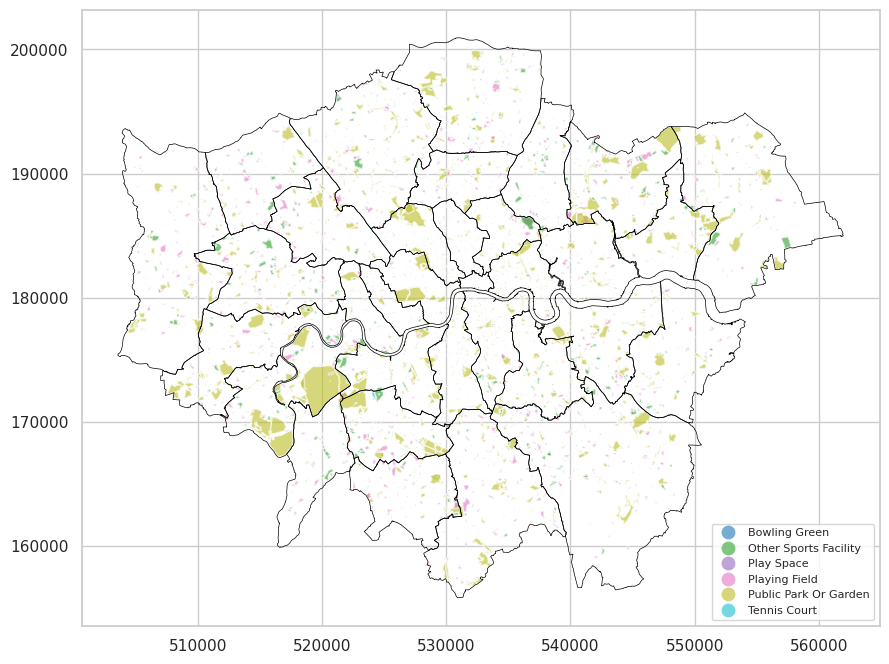

In [ ]:

if greenspace_gdf.crs != geo_data.crs:
    greenspace_gdf = greenspace_gdf.to_crs(geo_data.crs)


london_greenspace = gpd.clip(greenspace_gdf, geo_data)


fig, ax = plt.subplots(figsize=(12, 8))
london_greenspace.plot(
    ax=ax, 
    column='function',  
    cmap='tab10',       
    legend=True,
    alpha=0.6,
        legend_kwds={
        'loc': 'lower right',  
        'fontsize': 8          
    }  
)


geo_data.boundary.plot(ax=ax, color='black', linewidth=0.5)

#ax.set_title("Greenspaces within London Boundary by Type", fontsize=16)


plt.show()

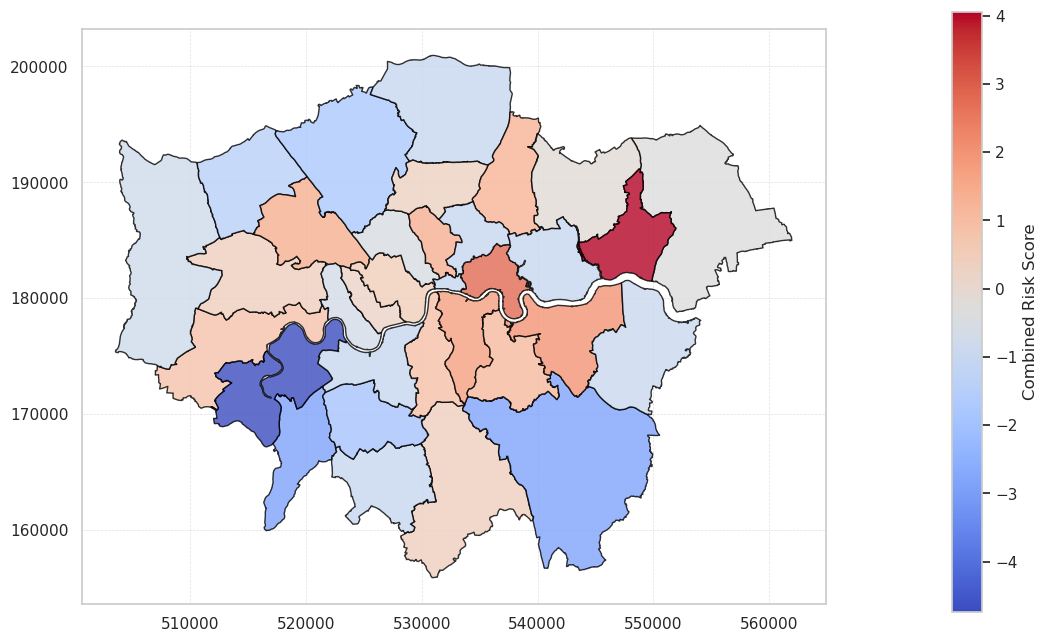

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd


geo_data['combined_score'] = geo_data['combined_score'].fillna(-1) 


fig, ax = plt.subplots(figsize=(12, 10))


geo_data.plot(
    column='combined_score', 
    cmap='coolwarm', 
    legend=True, 
    legend_kwds={
        'label': 'Combined Risk Score', 
        'orientation': 'vertical',
        'shrink': 0.8  
    },
    ax=ax, 
    alpha=0.8, 
    edgecolor='black',
    missing_kwds={
        "color": "#fafafa", 
        "label": "No Data"   
    }
)


ax.grid(True, linestyle="--", linewidth=0.5, color="lightgrey", alpha=0.7)


cb = ax.get_figure().get_axes()[-1]  
cb.set_position([0.85, 0.2, 0.03, 0.6]) 


plt.axis("on")  
plt.show()

In [39]:
print(greenspace_gdf.head())

                                      id               function distName1  \
1   1E2750FA-76E1-3552-E063-AAEFA00A7A80             Play Space      None   
3   1E27509D-FA14-3552-E063-AAEFA00A7A80             Play Space      None   
8   1E2750A7-F30B-3552-E063-AAEFA00A7A80             Play Space      None   
9   1E2750ED-B5C8-3552-E063-AAEFA00A7A80  Other Sports Facility      None   
10  1E2750ED-B5C6-3552-E063-AAEFA00A7A80           Tennis Court      None   

   distName2 distName3 distName4  \
1       None      None      None   
3       None      None      None   
8       None      None      None   
9       None      None      None   
10      None      None      None   

                                             geometry  
1   POLYGON Z ((462520.89 1190881.72 0, 462524.51 ...  
3   POLYGON Z ((451031.61 1191230.69 0, 451024.32 ...  
8   POLYGON Z ((462261.31 1208879.4 0, 462287.72 1...  
9   POLYGON Z ((460892.28 1209056.2 0, 460891.9 12...  
10  POLYGON Z ((460890.3 1209073 0, 4608

In [ ]:

borough_boundary = geo_data[geo_data['NAME'] == 'Barking and Dagenham']


greenspace_within_borough = gpd.clip(greenspace_gdf, borough_boundary)

In [ ]:

tennis_courts = greenspace_within_borough[greenspace_within_borough['function'] == 'Tennis Court']


tennis_courts_projected = tennis_courts.to_crs("EPSG:27700")  # 投影到平面坐标系


tennis_courts_projected['centroid'] = tennis_courts_projected.geometry.centroid


tennis_courts_with_centroid = tennis_courts_projected.to_crs("EPSG:4326")

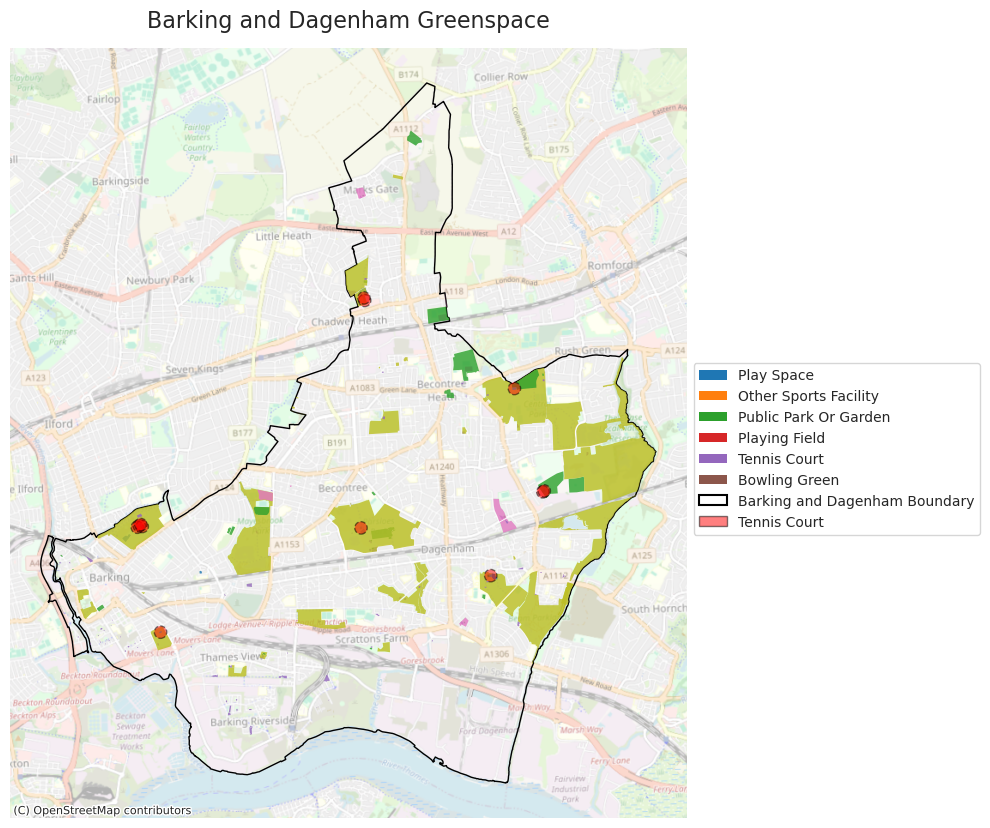

In [42]:
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.patches import Patch

# Plot Barking and Dagenham, greenspaces, and tennis courts on an OpenStreetMap background
fig, ax = plt.subplots(figsize=(12, 10))

# Plot Barking and Dagenham boundary
borough_boundary.plot(
    ax=ax, 
    edgecolor='black', 
    facecolor='none', 
    linewidth=1, 
    label='Barking and Dagenham Boundary'
)

# Plot greenspaces
greenspace_plot = greenspace_within_borough.set_geometry('geometry').plot(
    ax=ax,
    column='function',  # Categorize by 'function' column
    cmap='tab10',       # Use a categorical colormap
    legend=False,       # Disable automatic legend for the plot
    alpha=0.8,
    edgecolor='none'
)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, crs=borough_boundary.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

# Create a legend for greenspace types
unique_types = greenspace_within_borough['function'].unique()
color_map = plt.cm.tab10.colors  # Get the colors from the colormap
type_legend_handles = [
    Patch(facecolor=color_map[i % len(color_map)], edgecolor='none', label=f"{t}")
    for i, t in enumerate(unique_types)
]

# Plot tennis courts with black dashed edges and red translucent fill
ax.scatter(
    tennis_courts.geometry.centroid.x, 
    tennis_courts.geometry.centroid.y, 
    color='red', 
    edgecolor='black', 
    linewidth=1, 
    linestyle='dashed',  # Black dashed edge
    alpha=0.5,           # Semi-transparent fill
    s=80,                # Adjust size of the points
    label='Tennis Court' # Add label for legend
)

# Create additional legend handles for boundary
boundary_handle = Patch(facecolor='none', edgecolor='black', linewidth=1.5, label='Barking and Dagenham Boundary')

# Combine legends
legend_handles = type_legend_handles + [boundary_handle, Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Tennis Court')]

# Add legend to the plot, placing it outside the map area
ax.legend(
    handles=legend_handles, 
    loc='upper left',  # Position the legend in the upper left
    bbox_to_anchor=(1.0, 0.6),  # Shift it to the right outside the plot
    fontsize=10, 
    frameon=True
)

# Customize title and hide axes
plt.title("Barking and Dagenham Greenspace", fontsize=16, pad=15)
plt.axis("off")

# Show the plot
plt.show()

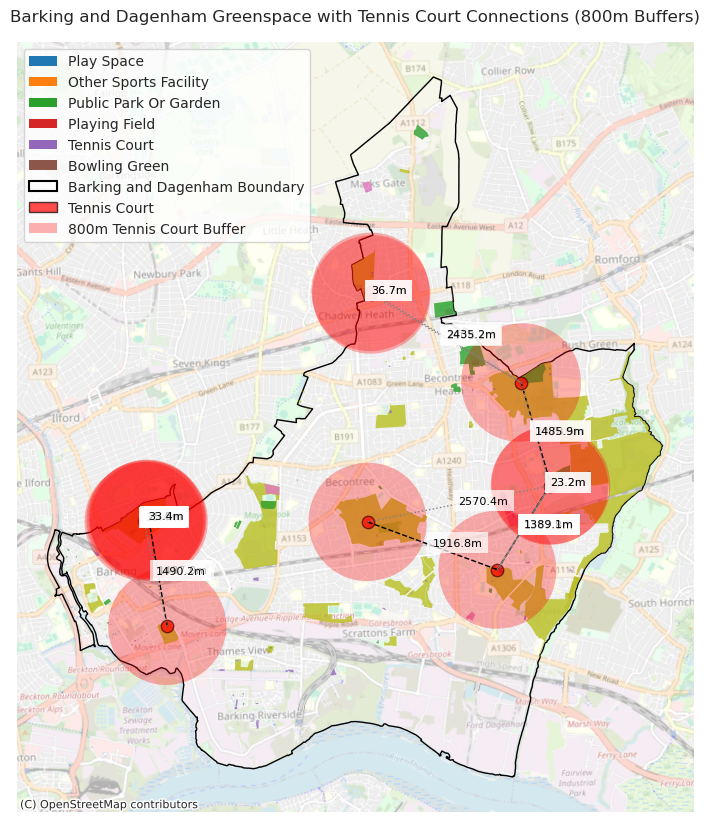

In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.patches import Patch
from geopy.distance import geodesic
from scipy.spatial import KDTree
import numpy as np

# Plot Barking and Dagenham, greenspaces, and tennis courts on an OpenStreetMap background
fig, ax = plt.subplots(figsize=(12, 10))

# Plot Barking and Dagenham boundary
borough_boundary.plot(
    ax=ax, 
    edgecolor='black', 
    facecolor='none', 
    linewidth=1, 
    label='Barking and Dagenham Boundary'
)

# Plot greenspaces
greenspace_plot = greenspace_within_borough.set_geometry('geometry').plot(
    ax=ax,
    column='function',  # Categorize by 'function' column
    cmap='tab10',       # Use a categorical colormap
    legend=False,       # Disable automatic legend for the plot
    alpha=0.8,
    edgecolor='none'
)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, crs=borough_boundary.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

# Tennis Court: 转换到平面坐标系计算几何中心
tennis_courts_projected = tennis_courts.to_crs("EPSG:27700")  # 转换到平面坐标系
tennis_coords_projected = tennis_courts_projected.geometry.centroid  # 计算平面坐标系中的几何中心
tennis_coords_wgs84 = tennis_coords_projected.to_crs("EPSG:4326")  # 转换回地理坐标系

# Plot tennis courts with red fill and black edges
ax.scatter(
    tennis_coords_projected.x, 
    tennis_coords_projected.y, 
    color='red', 
    edgecolor='black', 
    linewidth=1, 
    alpha=0.7,  # 调整透明度
    s=80, 
    label='Tennis Court'
)

# Plot tennis court buffers
buffers = tennis_courts_projected.buffer(800)
buffers.plot(
    ax=ax,
    edgecolor='none', 
    facecolor='red', 
    alpha=0.3,  
    label='_nolegend_'
)


tree = KDTree(np.array(list(zip(tennis_coords_projected.x, tennis_coords_projected.y))))
distances, indices = tree.query(np.array(list(zip(tennis_coords_projected.x, tennis_coords_projected.y))), k=4)


for i in range(len(tennis_coords_projected)):
    current_point = tennis_coords_projected.iloc[i]
    

    for neighbor_rank, line_style, line_color in zip(
        [1, 2],  
        ['dashed', 'dotted'],  
        ['black', 'gray']  
    ):
        if neighbor_rank >= len(indices[i]):
            continue
        nearest_index = indices[i, neighbor_rank]
        nearest_point = tennis_coords_projected.iloc[nearest_index]
        

        current_point_wgs84 = tennis_coords_wgs84.iloc[i]
        nearest_point_wgs84 = tennis_coords_wgs84.iloc[nearest_index]
        distance = geodesic(
            (current_point_wgs84.y, current_point_wgs84.x),
            (nearest_point_wgs84.y, nearest_point_wgs84.x)
        ).meters

        ax.plot(
            [current_point.x, nearest_point.x], 
            [current_point.y, nearest_point.y], 
            color=line_color, linestyle=line_style, linewidth=1
        )
        midpoint_x = (current_point.x + nearest_point.x) / 2
        midpoint_y = (current_point.y + nearest_point.y) / 2
        ax.text(
            midpoint_x, 
            midpoint_y, 
            f"{distance:.1f}m", 
            fontsize=8, 
            color='black', 
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
        )

# Create additional legend handles for boundary
boundary_handle = Patch(facecolor='none', edgecolor='black', linewidth=1.5, label='Barking and Dagenham Boundary')

# Combine legends
legend_handles = type_legend_handles + [
    boundary_handle, 
    Patch(facecolor='red', edgecolor='black', alpha=0.7, label='Tennis Court'),
    Patch(facecolor='red', edgecolor='none', alpha=0.3, label='800m Tennis Court Buffer')
]

# Add legend to the plot, placing it outside the map area
ax.legend(
    handles=legend_handles, 
    loc='upper left', 
    bbox_to_anchor=(0, 1),  
    fontsize=10, 
    frameon=True
)


# Customize title and hide axes
plt.title("Barking and Dagenham Greenspace with Tennis Court Connections (800m Buffers)", fontsize=12, pad=15)
plt.axis("off")

# Show the plot
plt.show()


In [ ]:

boundary_path = "data/london_boundary/London_Ward_CityMerged.shp"  
boundary_gdf = gpd.read_file(boundary_path)


imd_path = "data/2019_imd.csv"  
imd_df = gpd.read_file(imd_path)

In [ ]:
imd_df.columns

Index(['Ward Code', 'Ward Name', 'Borough', 'Population',
       'Working age population', 'Child population', '16-59 population',
       'Old age population', 'IMD Extent %', 'IMD Extent Rank',
       'IMD Average rank', 'IMD average rank rank', 'IMD average score',
       'IMD average score rank', 'Rank of worst LSOA', 'Worst LSOA Code',
       'Worst LSOA: % of resident in ward', 'Number of LSOAs',
       '# LSOAs in worst 5%', '# LSOAs in worst 10%', '# LSOAs in worst 20%',
       '# LSOAs in worst 50%', 'Income scale', 'Income score', 'Income rank',
       'Employment scale', 'Employment score', 'Employment rank',
       'IDACI scale', 'IDACI score', 'IDACI score rank', 'IDAOPI scale',
       'IDAOPI score', 'IDAOPI score (rank)'],
      dtype='object')

In [ ]:
boundary_gdf.columns

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'LB_GSS_CD', 'BOROUGH',
       'POLY_ID', 'geometry'],
      dtype='object')

In [ ]:
ward_data = boundary_gdf.merge(
    imd_df[['Borough', 'Ward Name', 'Population', 'IMD average score']],
    left_on=['BOROUGH', 'NAME'], 
    right_on=['Borough', 'Ward Name'],
    how='left'
)

In [ ]:
print(ward_data['Ward Name'].nunique())  
print(ward_data['geometry'].nunique())   

545
625


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

barking_wards = ward_data[ward_data['Borough'] == 'Barking and Dagenham']

In [ ]:
barking_wards.head()

NAME   GSS_CODE  HECTARES  NONLD_AREA  LB_GSS_CD  \
607  Gascoigne  E05000032   113.874       4.906  E09000002   
608     Thames  E05000039   788.848     120.125  E09000002   
609      River  E05000038   354.369      41.464  E09000002   
610    Village  E05000041   214.748       0.000  E09000002   
611      Abbey  E05000026   128.292       2.655  E09000002   

                  BOROUGH  POLY_ID  \
607  Barking and Dagenham    51280   
608  Barking and Dagenham   117012   
609  Barking and Dagenham   117013   
610  Barking and Dagenham    50858   
611  Barking and Dagenham    51353   

                                              geometry               Borough  \
607  POLYGON ((543574.5 183951.4, 543571.7 183956.6...  Barking and Dagenham   
608  POLYGON ((544418 183020.3, 544423.1 183022.9, ...  Barking and Dagenham   
609  POLYGON ((549072.8 183605.1, 549074.1 183608.1...  Barking and Dagenham   
610  POLYGON ((549049.3 184708.3, 549070.2 184710.3...  Barking and Dagenham   
611  POLYGON ((543595.5 184832.8, 543601.7 184831.2...  Barking and Dagenham   

     Ward Name Population IMD average score  
607  Gascoigne      12738              37.1  
608     Thames      13943              36.4  
609      River      11636              32.9  
610    Village      11253              36.1  
611      Abbey      14370              31.3

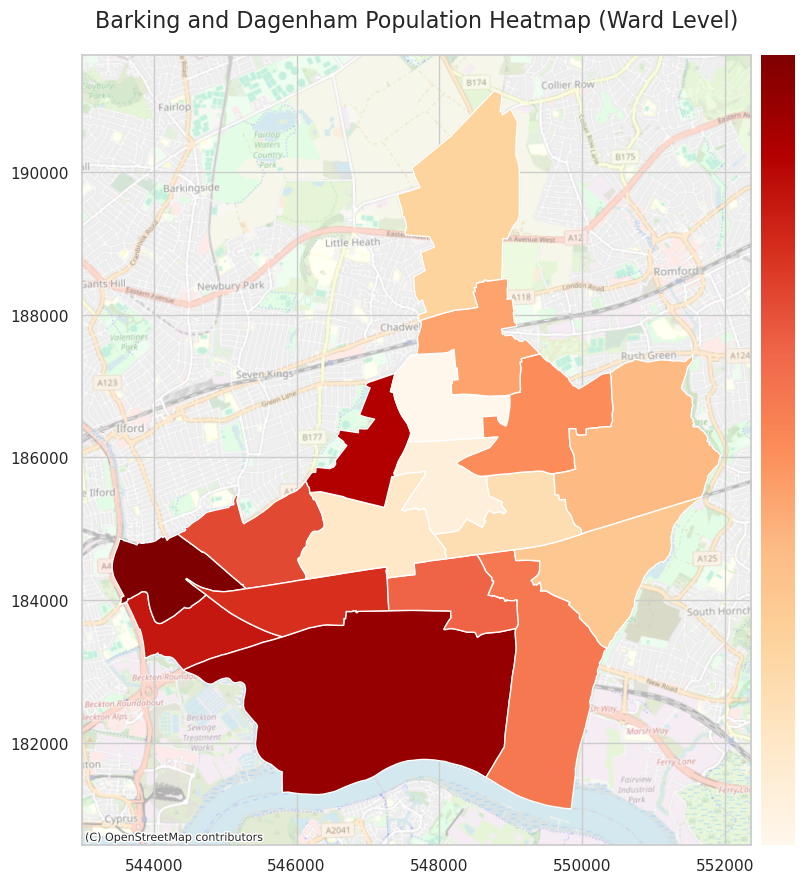

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(12, 10))


barking_wards.plot(
    column='Population',
    cmap='OrRd',
    legend=False,
    ax=ax
)


sm = plt.cm.ScalarMappable(
    cmap='OrRd', 
    norm=plt.Normalize(vmin=barking_wards['Population'].min(), vmax=barking_wards['Population'].max())
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label("Population Density", fontsize=12)


ctx.add_basemap(ax, crs=borough_boundary.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)


ax.set_title(
    "Barking and Dagenham Population Heatmap (Ward Level)", 
    fontsize=16, 
    pad=20
)


plt.subplots_adjust(top=0.9)


plt.axis("off")
plt.show()


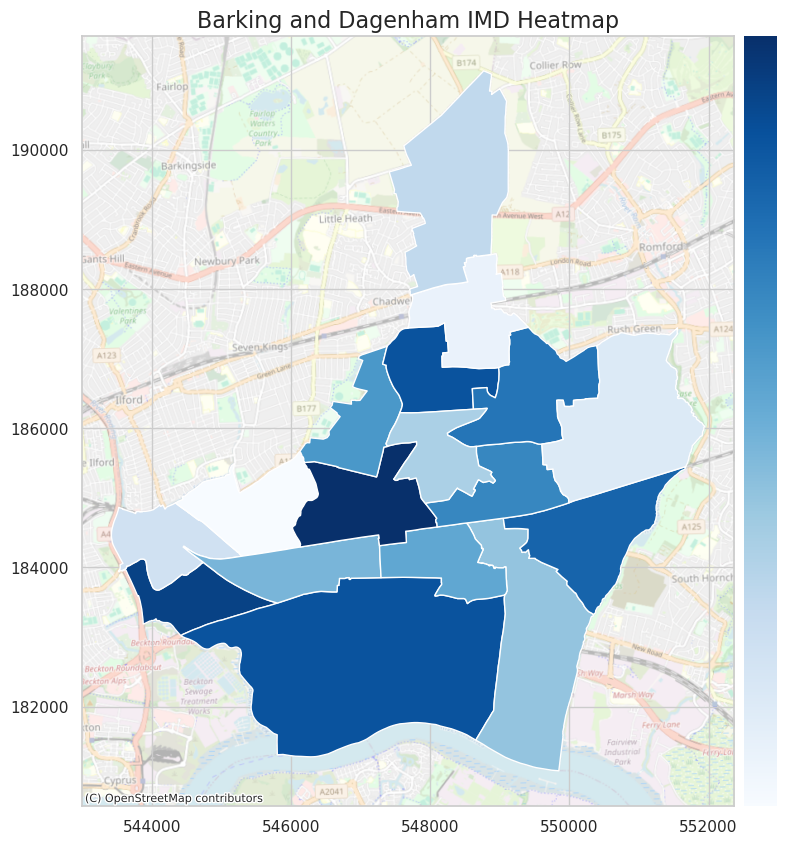

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))


barking_wards.plot(
    column='IMD average score',
    cmap='Blues',  
    legend=False,  
    ax=ax
)


plt.title("Barking and Dagenham IMD Heatmap", fontsize=16)



sm = plt.cm.ScalarMappable(
    cmap='Blues', 
    norm=plt.Normalize(vmin=barking_wards['IMD average score'].min(), vmax=barking_wards['IMD average score'].max())
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label("IMD Average Score", fontsize=12)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, crs=borough_boundary.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.5)

plt.axis("off")
plt.show()